<a href="https://colab.research.google.com/github/apetresc/rotman-api/blob/master/Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing required packages

In [1]:
import requests
import matplotlib.pyplot as plt
import random

In [2]:
from bs4 import BeautifulSoup
import re

# Using APIs to Train Models

#### Reading my API key from a local text file 

In [3]:
with open('C:/Users/ritvi/OneDrive/Documents/GitHub/thegreatestrepo/Yelp Review Sentiment Analysis using API and Web-scraping/Yelp Fusion API Key.txt') as f:
    lines = f.readlines()

In [4]:
YELP_TOKEN = lines[4]

In [5]:
r = requests.get("https://api.yelp.com/v3/businesses/search?location=Toronto&limit=50", headers={"Authorization": "Bearer %s" % YELP_TOKEN})

#### **Note:** 
Most ratings are positive (>3.5 stars) - this imbalanced rating issue can be improved by using the sort_by parameter in the API call, and randomly selecting businesses with the knowledge of how they are sorted, to ensure a mix of good and bad restaurants is scraped. We can sort the reviews by star rating, and ensure the entire spectrum of good-bad or (1-star to 5-stars) reviews are included in the input training data. 

##### API call higher limit=200

In [6]:
# r = requests.get("https://api.yelp.com/v3/businesses/search?location=Toronto&limit=200", headers={"Authorization": "Bearer %s" % YELP_TOKEN})

In [7]:
print(r.status_code, r.reason, r.content)

200 OK b'{"businesses": [{"id": "r_BrIgzYcwo1NAuG9dLbpg", "alias": "pai-northern-thai-kitchen-toronto-5", "name": "Pai Northern Thai Kitchen", "image_url": "https://s3-media3.fl.yelpcdn.com/bphoto/9QruaHywVEtolW9ELorHpA/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=L2Ypi5-4z-a_yUWHNfB05Q&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=L2Ypi5-4z-a_yUWHNfB05Q", "review_count": 3318, "categories": [{"alias": "thai", "title": "Thai"}], "rating": 4.5, "coordinates": {"latitude": 43.64784, "longitude": -79.38872}, "transactions": [], "price": "$$", "location": {"address1": "18 Duncan Street", "address2": "", "address3": "", "city": "Toronto", "zip_code": "M5H 3G8", "country": "CA", "state": "ON", "display_address": ["18 Duncan Street", "Toronto, ON M5H 3G8", "Canada"]}, "phone": "+14169014724", "display_phone": "+1 416-901-4724", "distance": 3009.3347434869856}, {"id": "iGEvDk6hsizigmXhDKs2Vg", "alias": 

In [8]:
r.json()

{'businesses': [{'id': 'r_BrIgzYcwo1NAuG9dLbpg',
   'alias': 'pai-northern-thai-kitchen-toronto-5',
   'name': 'Pai Northern Thai Kitchen',
   'image_url': 'https://s3-media3.fl.yelpcdn.com/bphoto/9QruaHywVEtolW9ELorHpA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?adjust_creative=L2Ypi5-4z-a_yUWHNfB05Q&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=L2Ypi5-4z-a_yUWHNfB05Q',
   'review_count': 3318,
   'categories': [{'alias': 'thai', 'title': 'Thai'}],
   'rating': 4.5,
   'coordinates': {'latitude': 43.64784, 'longitude': -79.38872},
   'transactions': [],
   'price': '$$',
   'location': {'address1': '18 Duncan Street',
    'address2': '',
    'address3': '',
    'city': 'Toronto',
    'zip_code': 'M5H 3G8',
    'country': 'CA',
    'state': 'ON',
    'display_address': ['18 Duncan Street', 'Toronto, ON M5H 3G8', 'Canada']},
   'phone': '+14169014724',
   'display_phone': '+1 416-901-4724',
   'distance':

### Getting list of Restaurants URLs 

In [9]:
urls=[]
for business in r.json()['businesses']:
    ind=business['url'].index("?")
    urls.append(business['url'][:ind])
urls

['https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5',
 'https://www.yelp.com/biz/seven-lives-tacos-y-mariscos-toronto',
 'https://www.yelp.com/biz/kinka-izakaya-original-toronto-4',
 'https://www.yelp.com/biz/banh-mi-boys-toronto',
 'https://www.yelp.com/biz/richmond-station-toronto',
 'https://www.yelp.com/biz/byblos-toronto-2',
 'https://www.yelp.com/biz/bang-bang-ice-cream-toronto-2',
 'https://www.yelp.com/biz/ramen-isshin-toronto',
 'https://www.yelp.com/biz/khao-san-road-toronto',
 'https://www.yelp.com/biz/miku-toronto-2',
 'https://www.yelp.com/biz/blaze-pizza-toronto-7',
 'https://www.yelp.com/biz/yasu-toronto-8',
 'https://www.yelp.com/biz/sansotei-ramen-toronto-2',
 'https://www.yelp.com/biz/jacobs-and-co-steakhouse-toronto',
 'https://www.yelp.com/biz/insomnia-restaurant-and-lounge-toronto',
 'https://www.yelp.com/biz/gusto-101-toronto',
 'https://www.yelp.com/biz/baretto-caffe-toronto-4',
 'https://www.yelp.com/biz/canoe-toronto-2',
 'https://www.yelp.com/biz/mi

#### Looking at just the first restaurant on the list:'Pai Northern Thai Kitchen':

In [10]:
htmls=requests.get('https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5')
text=BeautifulSoup(htmls.text, 'html.parser')
text
# text.find_all('div', class_.startswith('review'))

<!DOCTYPE html>
<html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;"><head><script>document.documentElement.className=document.documentElement.className.replace(/no-js/,"js");</script><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="en-US" http-equiv="Content-Language"/><meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/><link content="#FF1A1A" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" rel="mask-icon" sizes="any"/><link href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b05852393ae5/assets/img/logos/favicon.ico" rel="shortcut icon"/><script> window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();</script><script>
            window.yelp = window.yelp || {};
      

#### Pulling complete reviews

In [11]:
p_comments=text.find_all('p', class_="comment__09f24__gu0rG css-qgunke")
reviews=[]
for review in p_comments:
    reviews.append(review.get_text().replace('\xa0', ''))
reviews

['traveling in the area and had a taste for Thai. the reviews alone were enough to make me want to try Pai. However, not being from toronto, I had no idea how bad traffic would be downtown. Holy cow, it was excruciating. an hour to go 5 miles. THat said, it was totally worth it. before ordering i look over at two young women who had jsut received their order. after the first bite, one of them tossed her head back and had the biggest smile on her face. colleague and i each has a small bowl of tom yum, split an order of Spring Rolls, and we split the pad thai and the massamam curry. yeah this is 100% a revisit. the food was great and even worth that terrible drive.',
 'Come back again for dinner. Very popular place and good vibes. The server is very efficient to serve. The dinner only allows 90 minutes per table. Once found you are almost done, he will deliver the bill ( that is only 60 minutes) .The Khao Sai is good. Its curry is very rich. Tom Yum Kung also has strong flavour and have 

#### Pulling Star Ratings

In [12]:
ratings=[]
ratings_comments=text.find_all('div', class_="five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
for rating in ratings_comments:
    ratings.append(rating['aria-label'][0])
ratings=ratings[:10]
ratings

['5', '4', '4', '5', '5', '4', '5', '5', '5', '5']

##### ^Only the first 10 stars connected to reviews of the restaurant - the ratings after, are associated with the "People also viewed" section at the bottom of the page

### Combining Reviews and Star Ratings

In [13]:
review_labels=list(zip(reviews, ratings))
review_labels

[('traveling in the area and had a taste for Thai. the reviews alone were enough to make me want to try Pai. However, not being from toronto, I had no idea how bad traffic would be downtown. Holy cow, it was excruciating. an hour to go 5 miles. THat said, it was totally worth it. before ordering i look over at two young women who had jsut received their order. after the first bite, one of them tossed her head back and had the biggest smile on her face. colleague and i each has a small bowl of tom yum, split an order of Spring Rolls, and we split the pad thai and the massamam curry. yeah this is 100% a revisit. the food was great and even worth that terrible drive.',
  '5'),
 ('Come back again for dinner. Very popular place and good vibes. The server is very efficient to serve. The dinner only allows 90 minutes per table. Once found you are almost done, he will deliver the bill ( that is only 60 minutes) .The Khao Sai is good. Its curry is very rich. Tom Yum Kung also has strong flavour

### Pagination

In [14]:
# links=text.find_all('a', href=True)
links=text.find_all('a', class_="next-link navigation-button__09f24__m9qRz css-144i0wq")
links

# <a href="#" class="pagination-link-component__09f24__JRiQO css-144i0wq"  aria-label="Page: 2"

[<a aria-label="Next" class="next-link navigation-button__09f24__m9qRz css-144i0wq" href="#" role="link"><span alt="" aria-hidden="true" class="icon--24-chevron-right-v2 navigation-button-icon__09f24__Bmrde css-1kq79li" role="img"><svg class="icon_svg" height="24" width="24"><path d="M9.75 17.58a1 1 0 01-.7-.28 1 1 0 010-1.42l3.8-3.88L9 8.12a1 1 0 111.41-1.42L15 11.3a1 1 0 010 1.4l-4.5 4.58a1 1 0 01-.75.3z"></path></svg></span></a>]

#### Using the patterns in the URLs for subsequent pages - and looping through all the pages to store reviews:

https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5
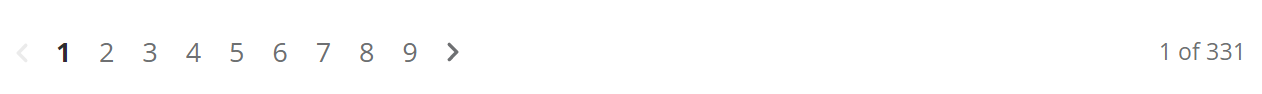

https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=10
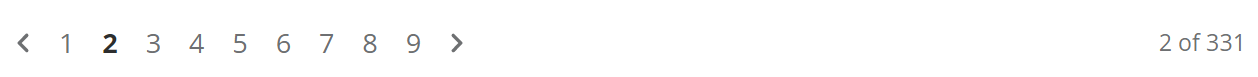

For each page, the 'start=' in the URL increases by 10. Looping through all pages for each restaurant:

In [15]:
pages=str(text.find_all('div', class_="border-color--default__09f24__NPAKY text-align--center__09f24__fYBGO"))
pages

'[<div class="border-color--default__09f24__NPAKY text-align--center__09f24__fYBGO"><span class="css-chan6m">1 of 331</span></div>]'

^ There are 331 pages of reviews for this restaurant (10 reviews per page)
The following strips the span and stores the number of pages to iterate through for each restaurant.

In [16]:
pages=str(pages)
startind=pages.index("of")
startind+=3
endind=pages.index("</span")
pages=int(pages[startind:endind])
pages

331

**Note:** For every restaurant, all pages contain 10 reviews - **except** for the last page.
I will not be scraping the last page for each restaurant, since they may contain less than 10 reviews, which will mess up the logic I've setup for the upcoming loops. The goal is to scrape as many reviews/ratings as possible, so missing out on the last few reviews (<10) for each restaurant seems like a small trade-off.
The loop will run until page 330.

Loop to store all the pages for this restaurant:

In [17]:
t='https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5'
revurls=[t]
for i in range(2,pages):
    revurls.append(t+"?start="+str(i*10-10))
revurls

['https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=10',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=20',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=30',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=40',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=50',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=60',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=70',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=80',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=90',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=100',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=110',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=120',
 'https://www.yelp.com/biz/pai-northern-thai

### Storing all review page URLs for each restaurant: 

In [49]:
reviewurls=[]
for url in urls:
    reviewurls.append(url)
    htmls=requests.get(url)
    text=BeautifulSoup(htmls.text, 'html.parser')
    pages=str(text.find_all('div', class_="border-color--default__09f24__NPAKY text-align--center__09f24__fYBGO"))
    startind=pages.index("of")+3
    endind=pages.index("</span")
    num_pages=int(pages[startind:endind])
    for i in range(2,num_pages):
        reviewurls.append(url+"?start="+str(i*10-10))

reviewurls

['https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=10',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=20',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=30',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=40',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=50',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=60',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=70',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=80',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=90',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=100',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=110',
 'https://www.yelp.com/biz/pai-northern-thai-kitchen-toronto-5?start=120',
 'https://www.yelp.com/biz/pai-northern-thai

Total of 3690 pages of reviews for 50 restaurants.

In [54]:
len(reviewurls)

3690

### All reviews and ratings combined

In [55]:
allreviews=[]
allratings=[]
for url in reviewurls:
    htmls=requests.get(url)
    text=BeautifulSoup(htmls.text, 'html.parser')
    #Appending 10 reviews for this url to reviews[]
    reviews=[]
    p_comments=text.find_all('p', class_="comment__09f24__gu0rG css-qgunke")
    for review in p_comments:
        reviews.append(review.get_text().replace('\xa0', ''))        
    #Appending the 10 ratings with the reviews for this url to tempratings[]
    tempratings=[]
    ratings_comments=text.find_all('div', class_="five-stars__09f24__mBKym five-stars--regular__09f24__DgBNj display--inline-block__09f24__fEDiJ border-color--default__09f24__NPAKY")
    for rating in ratings_comments:
        tempratings.append(rating['aria-label'][0])
    #Extending final list of allreviews by reviews[], final list of allratings by tempratings[] 
    allratings.extend(tempratings[:10])
    allreviews.extend(reviews)

### Casting the ratings into integers

In [70]:
tempratings=[int(rating) for rating in allratings]

In [71]:
tempratings

[5,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 3,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 4,
 4,
 3,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 5,
 5,
 3,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 3,
 5,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 4,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 3,
 5,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 1,
 5,
 5,
 4,
 5,
 5,
 3,
 5,
 4,
 2,
 4,
 5,
 5,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 5,
 5,
 5,
 1,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 1,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 4,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 5,
 5,
 3,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 3,
 5,
 5,
 4,
 2,
 5,
 5,
 4,
 5,
 4,
 5,
 4,
 1,
 1,
 5,
 5,
 1,
 5,
 5,
 5,
 1,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 4,
 5,
 5,
 5,


In [72]:
review_labels=list(zip(allreviews, tempratings))

##### A total of 36770 reviews were scraped for 50 restaurants. The restaurants themselves had little variation in terms of average rating, so the dataset is a little imbalanced. But, as shown in the histogram further, the number of observations for low ratings are high enough to create a customized training dataset with similar counts for each rating, i.e. we can discard rows randomly for the higher ratings to create a balanced dataset - undersampling. 
##### Or, as mentioned early on - taking on a wider range of restaurants, sorted by rating will ensure we get a good mix of all ratings in the dataset.

In [73]:
len(review_labels)

36770

In [85]:
import pandas as pd
dfratings=pd.DataFrame(tempratings)

In [88]:
dfratings.rename(columns = {0:'ratings'}, inplace = True)
dfratings.head()

ratings
0        5
1        4
2        4
3        5
4        5

array([[<AxesSubplot:title={'center':'ratings'}>]], dtype=object)

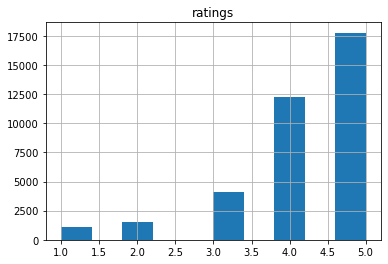

In [90]:
dfratings.hist()

In [74]:
review_labels

[('traveling in the area and had a taste for Thai. the reviews alone were enough to make me want to try Pai. However, not being from toronto, I had no idea how bad traffic would be downtown. Holy cow, it was excruciating. an hour to go 5 miles. THat said, it was totally worth it. before ordering i look over at two young women who had jsut received their order. after the first bite, one of them tossed her head back and had the biggest smile on her face. colleague and i each has a small bowl of tom yum, split an order of Spring Rolls, and we split the pad thai and the massamam curry. yeah this is 100% a revisit. the food was great and even worth that terrible drive.',
  5),
 ('Come back again for dinner. Very popular place and good vibes. The server is very efficient to serve. The dinner only allows 90 minutes per table. Once found you are almost done, he will deliver the bill ( that is only 60 minutes) .The Khao Sai is good. Its curry is very rich. Tom Yum Kung also has strong flavour a

In [75]:
review_features = [(x.split(' '), 'positive' if y > 3 else 'negative') for (x, y) in review_labels]
review_features

[(['traveling',
   'in',
   'the',
   'area',
   'and',
   'had',
   'a',
   'taste',
   'for',
   'Thai.',
   'the',
   'reviews',
   'alone',
   'were',
   'enough',
   'to',
   'make',
   'me',
   'want',
   'to',
   'try',
   'Pai.',
   'However,',
   'not',
   'being',
   'from',
   'toronto,',
   'I',
   'had',
   'no',
   'idea',
   'how',
   'bad',
   'traffic',
   'would',
   'be',
   'downtown.',
   'Holy',
   'cow,',
   'it',
   'was',
   'excruciating.',
   'an',
   'hour',
   'to',
   'go',
   '5',
   'miles.',
   'THat',
   'said,',
   'it',
   'was',
   'totally',
   'worth',
   'it.',
   'before',
   'ordering',
   'i',
   'look',
   'over',
   'at',
   'two',
   'young',
   'women',
   'who',
   'had',
   'jsut',
   'received',
   'their',
   'order.',
   'after',
   'the',
   'first',
   'bite,',
   'one',
   'of',
   'them',
   'tossed',
   'her',
   'head',
   'back',
   'and',
   'had',
   'the',
   'biggest',
   'smile',
   'on',
   'her',
   'face.',
   'colleagu

### Simple Sentiment Analysis Model:

In [76]:
from nltk.sentiment import SentimentAnalyzer
import nltk.sentiment.util
from nltk.classify import NaiveBayesClassifier

random.shuffle(review_features)
training_docs = review_features[:120]
test_docs = review_features[120:]

print("Training: %d, Testing: %d" % (len(training_docs), len(test_docs)))

sentim_analyzer = SentimentAnalyzer()

Training: 120, Testing: 36650


In [78]:
all_words_neg = sentim_analyzer.all_words([nltk.sentiment.util.mark_negation(doc) for doc in training_docs])
all_words_neg

['Bang',
 'Bang',
 'is',
 'a',
 'really',
 'cute',
 'shop.',
 'Be',
 'prepared',
 'to',
 'wait',
 'in',
 'line',
 'before',
 'you',
 'get',
 'your',
 'delicious',
 'ice',
 'cream',
 'cookie',
 'sandwich.',
 'I',
 'had',
 'a',
 'mint',
 'chocolate',
 'chip',
 'ice',
 'cream',
 'sandwich',
 'between',
 'two',
 'chocolate',
 'chip',
 'cookies.',
 'Very',
 'refreshing',
 'on',
 'a',
 'hot',
 'summer',
 'day.',
 'This',
 'is',
 'a',
 'good',
 'date',
 'place',
 'to',
 'grab',
 'a',
 'sweet',
 'treat',
 'and',
 'walk',
 'around',
 'the',
 'Ossington',
 'area.',
 'It',
 'is',
 'not',
 'a_NEG',
 'sit_NEG',
 'down_NEG',
 'dessert_NEG',
 'place._NEG',
 'Gave_NEG',
 'it_NEG',
 '4_NEG',
 'stars_NEG',
 'because_NEG',
 'I_NEG',
 'find_NEG',
 'the_NEG',
 'whole_NEG',
 'concept_NEG',
 'of_NEG',
 'ordering_NEG',
 'an_NEG',
 'ice_NEG',
 'cream_NEG',
 'cookie_NEG',
 'sandwich_NEG',
 'for_NEG',
 'over_NEG',
 '$5_NEG',
 'a_NEG',
 'bit_NEG',
 'ridiculous_NEG',
 'anywhere,_NEG',
 'but_NEG',
 'Bang_NEG',
 'Ba

In [79]:
unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
sentim_analyzer.add_feat_extractor(nltk.sentiment.util.extract_unigram_feats, unigrams=unigram_feats)

In [80]:
training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(test_docs)

In [81]:
trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
     print('{0}: {1}'.format(key, value))

Training classifier
Evaluating NaiveBayesClassifier results...
Accuracy: 0.7628103683492496
F-measure [negative]: 0.24336321699016447
F-measure [positive]: 0.8593616023037971
Precision [negative]: 0.2928361960620025
Precision [positive]: 0.8331973898858075
Recall [negative]: 0.20819061801935965
Recall [positive]: 0.8872223150158677


<BarContainer object of 5 artists>

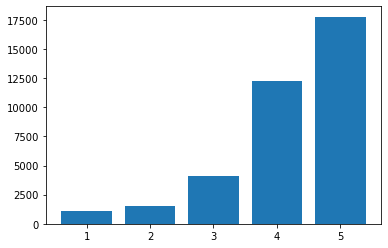

In [82]:
from collections import defaultdict

c = defaultdict(int)
for x in review_labels:
    c[x[1]] += 1

plt.bar(c.keys(), c.values())